In [31]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.inspection import DecisionBoundaryDisplay

In [32]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [36]:
# Model Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.94
Precision: 0.97
Recall: 0.94
F1-Score: 0.95
Confusion Matrix:
[[ 60   3]
 [  7 101]]


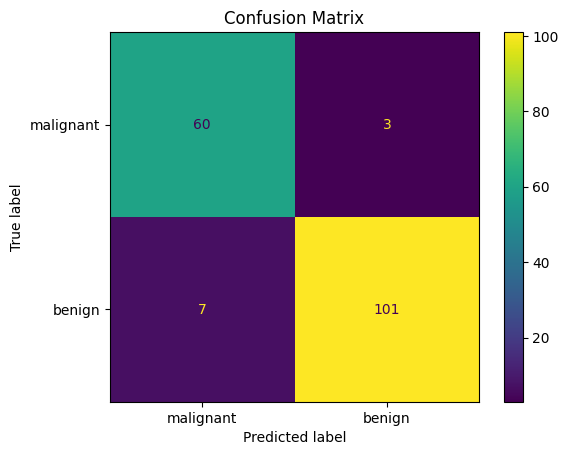

In [37]:
# Visualize the confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=data.target_names).plot()
plt.title("Confusion Matrix")
plt.show()

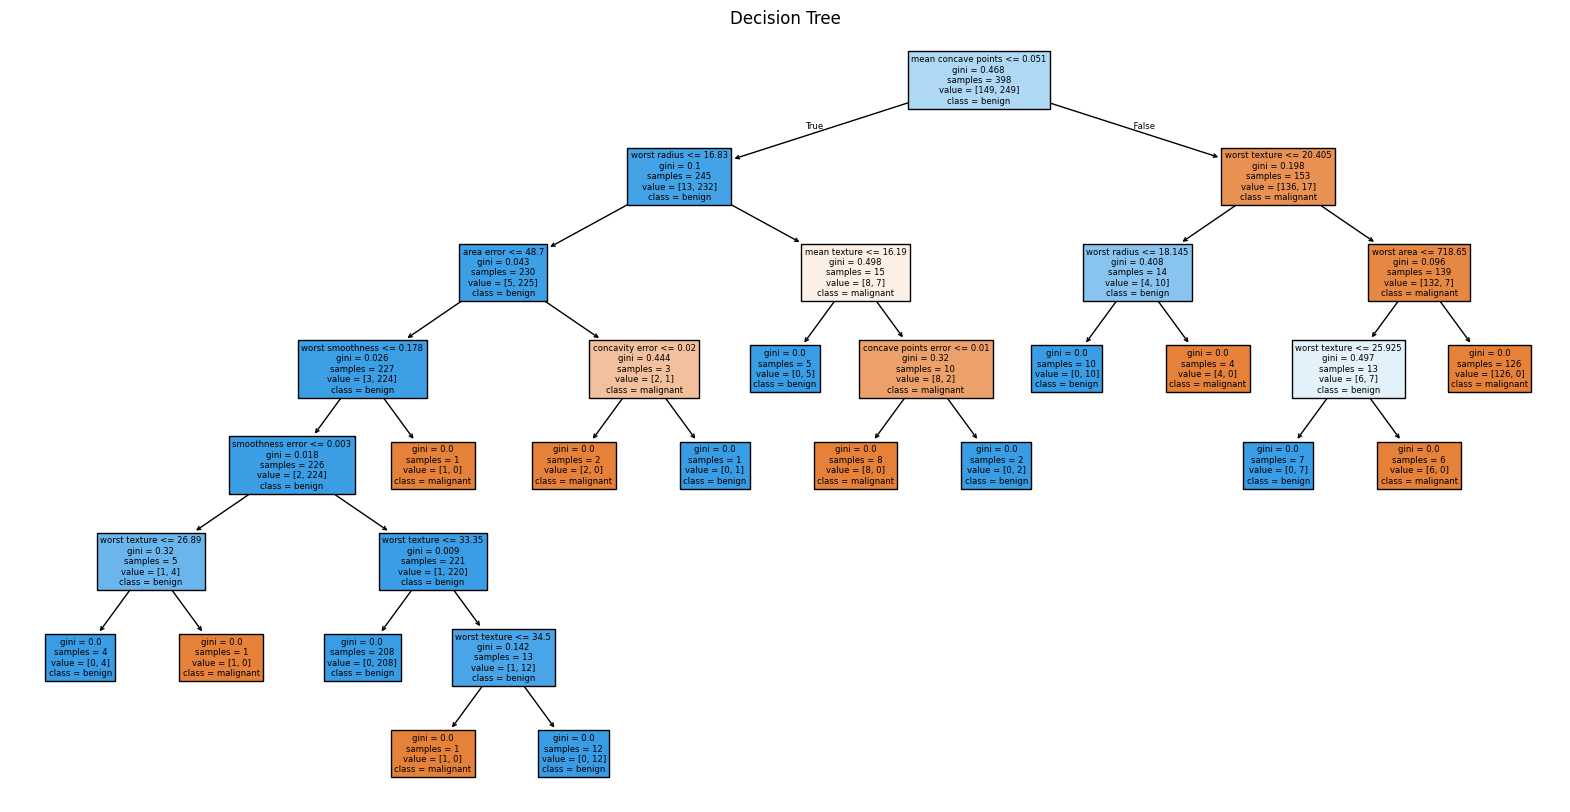

In [38]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree")
plt.show()

In [39]:
# Train a new Decision Tree classifier using only the first two features for visualization
clf_2d = DecisionTreeClassifier(random_state=42)
clf_2d.fit(X_train[:, :2], y_train)  # Use only the first two features

DecisionTreeClassifier(random_state=42)

<Figure size 1000x600 with 0 Axes>

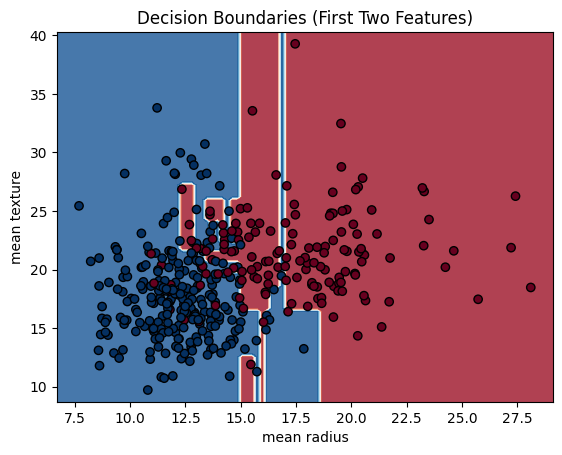

In [40]:
# Visualize Decision Boundaries
plt.figure(figsize=(10, 6))
DecisionBoundaryDisplay.from_estimator(
    clf_2d,
    X_train[:, :2],
    response_method="predict",
    cmap=plt.cm.RdBu,
    alpha=0.8
)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='black')
plt.title("Decision Boundaries (First Two Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

In [41]:
# Analyze the impact of hyperparameters
def evaluate_hyperparameters(max_depth=None, min_samples_split=2, min_samples_leaf=1):
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

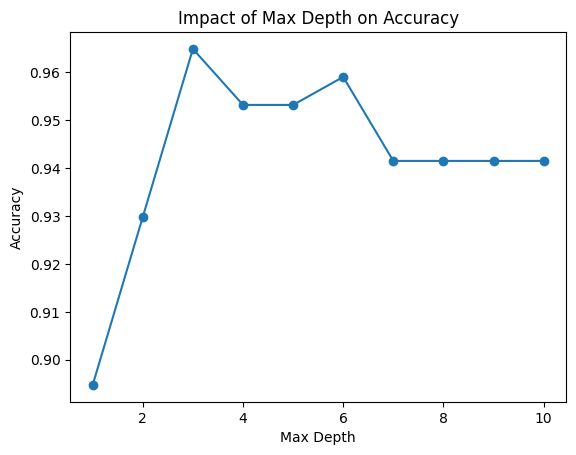

In [42]:
# Test different values for max_depth
max_depths = range(1, 11)
accuracies = [evaluate_hyperparameters(max_depth=d) for d in max_depths]
plt.plot(max_depths, accuracies, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Impact of Max Depth on Accuracy")
plt.show()

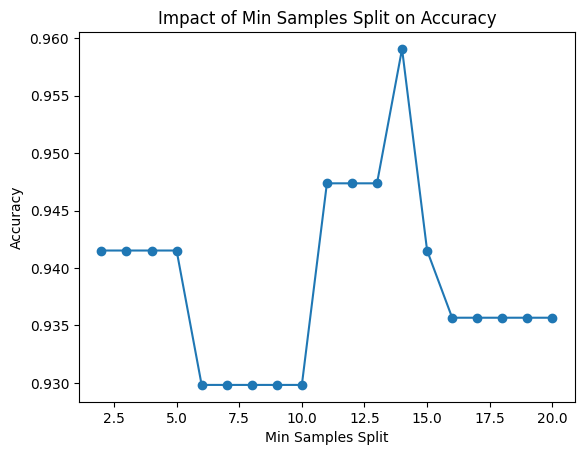

In [43]:
# Test different values for min_samples_split
min_samples_splits = range(2, 21)
accuracies = [evaluate_hyperparameters(min_samples_split=s) for s in min_samples_splits]
plt.plot(min_samples_splits, accuracies, marker='o')
plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.title("Impact of Min Samples Split on Accuracy")
plt.show()

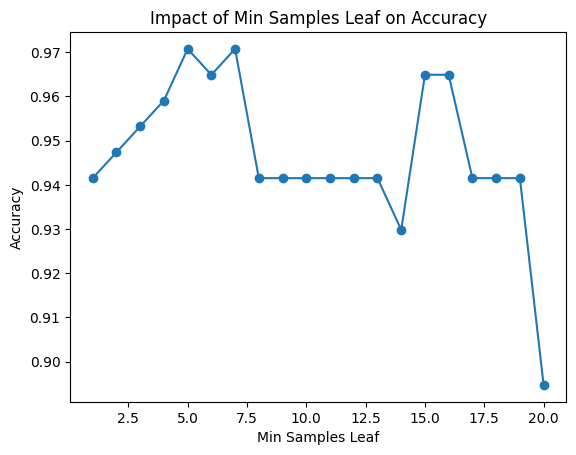

In [44]:
# Test different values for min_samples_leaf
min_samples_leaves = range(1, 21)
accuracies = [evaluate_hyperparameters(min_samples_leaf=l) for l in min_samples_leaves]
plt.plot(min_samples_leaves, accuracies, marker='o')
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
plt.title("Impact of Min Samples Leaf on Accuracy")
plt.show()

In [45]:
# User Input for Hyperparameters
print("\nUser Input for Hyperparameters:")
max_depth = int(input("Enter max_depth (e.g., 3, 5, 10): "))
min_samples_split = int(input("Enter min_samples_split (e.g., 2, 5, 10): "))
min_samples_leaf = int(input("Enter min_samples_leaf (e.g., 1, 2, 5): "))


User Input for Hyperparameters:
Enter max_depth (e.g., 3, 5, 10): 3
Enter min_samples_split (e.g., 2, 5, 10): 5
Enter min_samples_leaf (e.g., 1, 2, 5): 2


In [47]:
# Train and evaluate the model with user-specified hyperparameters
user_clf = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42
)
user_clf.fit(X_train, y_train)
y_pred_user = user_clf.predict(X_test)

In [48]:
# Evaluate the model with user-specified hyperparameters
accuracy_user = accuracy_score(y_test, y_pred_user)
precision_user = precision_score(y_test, y_pred_user)
recall_user = recall_score(y_test, y_pred_user)
f1_user = f1_score(y_test, y_pred_user)
conf_matrix_user = confusion_matrix(y_test, y_pred_user)

print("\nModel Evaluation with User-Specified Hyperparameters:")
print(f"Accuracy: {accuracy_user:.2f}")
print(f"Precision: {precision_user:.2f}")
print(f"Recall: {recall_user:.2f}")
print(f"F1-Score: {f1_user:.2f}")
print("Confusion Matrix:")
print(conf_matrix_user)


Model Evaluation with User-Specified Hyperparameters:
Accuracy: 0.96
Precision: 0.96
Recall: 0.98
F1-Score: 0.97
Confusion Matrix:
[[ 59   4]
 [  2 106]]


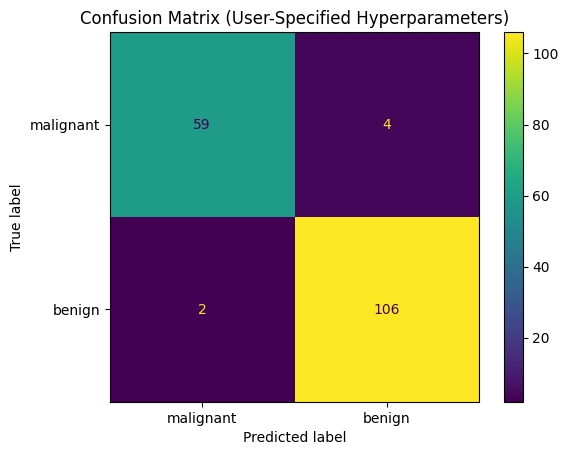

In [49]:
# Visualize the confusion matrix for the user-specified model
ConfusionMatrixDisplay(conf_matrix_user, display_labels=data.target_names).plot()
plt.title("Confusion Matrix (User-Specified Hyperparameters)")
plt.show()